# Import data

In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load dataset from Excel
data = pd.read_excel("depression_sampling.xlsx")

# Preprocessing Data

In [17]:
#cek jumlah baris data
print(data.shape)

(499, 8)


In [20]:
#mengecek jumlah data tiap atribut depresi
data['depression'].value_counts()

Low         219
Moderate    169
High         98
Very Low     13
Name: depression, dtype: int64

pengecekan akurasi training dan testing sebelum upsampling menggunakan logistic regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Split features and target variable
X = data.drop(columns=['depression'])
y = data['depression']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression(max_iter=10000, solver='saga')

# Train the model on the training set
model.fit(X_train, y_train)

# Predict the labels on training set
y_train_pred = model.predict(X_train)

# Predict the labels on testing set
y_test_pred = model.predict(X_test)

# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)


Accuracy on training set: 0.7669172932330827
Accuracy on testing set: 0.75


pengecekan K-Fold Cross Validation terhadap data sebelum upsampling

Confusion matrix, without normalization
[[236   0  58   0]
 [  5 540 111   1]
 [ 43 117 347   0]
 [  0  15   8  16]]


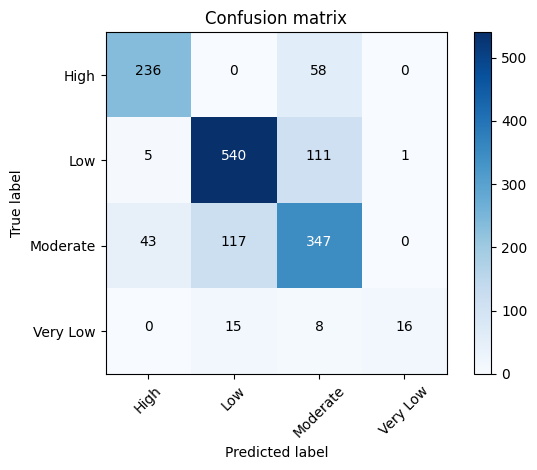

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import plot_confusion_matrix


# Create a repeated stratified k-fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Perform cross-validation and collect true and predicted labels
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Collect true and predicted labels
    true_labels.extend(y_test)
    predicted_labels.extend(y_pred)

# Generate confusion matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=model.classes_, title='Confusion matrix')

plt.show()

Dari matriks ini, terlihat bahwa model cenderung memprediksi kelas mayoritas ("Low" dan "Moderate") dengan lebih baik daripada kelas minoritas ("High" dan "Very Low"). Hal ini menunjukkan adanya ketidakseimbangan dalam dataset, di mana kelas mayoritas memiliki jumlah sampel yang jauh lebih besar daripada kelas minoritas. Hal ini dapat menyebabkan model memiliki kinerja yang lebih baik dalam memprediksi kelas mayoritas sementara kinerja memprediksi kelas minoritas menjadi kurang memuaskan.

Algoritma SMOTE (Synthetic Minority Over-sampling Technique) merupakan salah satu pendekatan yang efektif untuk menangani masalah ketidakseimbangan kelas dalam dataset. Algoritma ini bekerja dengan cara menciptakan sampel sintetis baru untuk kelas minoritas, sehingga meningkatkan jumlah sampel dalam kelas minoritas sehingga seimbang dengan kelas mayoritas.

Alasan menggunakan algoritma SMOTE dalam kasus ketidakseimbangan kelas adalah sebagai berikut:

1. **Meningkatkan Kinerja Model**: Dengan meningkatkan jumlah sampel dalam kelas minoritas, algoritma SMOTE dapat membantu model untuk belajar pola yang lebih baik dalam kelas minoritas. Ini dapat mengurangi bias model terhadap kelas mayoritas dan meningkatkan kinerja dalam memprediksi kelas minoritas.

2. **Mengurangi Risiko Overfitting**: Dalam kasus ketidakseimbangan kelas, model cenderung memperoleh bias terhadap kelas mayoritas karena lebih banyak contoh untuk dipelajari. Dengan meningkatkan jumlah sampel dalam kelas minoritas, algoritma SMOTE dapat membantu mengurangi risiko overfitting yang disebabkan oleh ketidakseimbangan tersebut.

3. **Mempertahankan Informasi Asli**: Algoritma SMOTE menciptakan sampel sintetis baru dengan menggunakan teknik interpolasi antara tetangga-tetangga terdekat dari sampel minoritas. Ini memastikan bahwa informasi asli dari kelas minoritas tetap dipertahankan dalam dataset yang disintesis.

4. **Penerapan yang Mudah**: SMOTE tersedia dalam berbagai library machine learning seperti scikit-learn, sehingga implementasinya relatif mudah dalam analisis data menggunakan Python.

Dengan demikian, menggunakan algoritma SMOTE dapat membantu meningkatkan kinerja model dalam menangani masalah ketidakseimbangan kelas, memastikan bahwa model dapat memprediksi dengan lebih baik untuk kelas minoritas.

# Penerapan SMOTE

In [3]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load dataset from Excel
data = pd.read_excel("depression_sampling.xlsx")

# Split features and target variable
X = data.drop(columns=['depression'])
y = data['depression']

# Apply SMOTE without specifying a sampling strategy
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target variable
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['depression'])], axis=1)

# Save resampled data to Excel
resampled_data.to_excel("depression_sampling_resampled_new.xlsx", index=False)

## DATASET INFORMATION (DATA RESAMPLED)

In [5]:
#load data resampled
data_resampled = pd.read_excel("depression_sampling_resampled_new.xlsx")

In [5]:
data_resampled.head()

,angry,fear,disgust,happy,nutral,sad,surprise,depression
0,2,5,7,6,6,4,1,Moderate
1,10,2,2,9,9,10,9,Low
2,7,6,2,5,8,5,8,Moderate
3,5,3,3,4,5,6,8,Moderate
4,6,4,10,6,7,6,8,Moderate


In [6]:
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   angry       876 non-null    int64 
 1   fear        876 non-null    int64 
 2   disgust     876 non-null    int64 
 3   happy       876 non-null    int64 
 4   nutral      876 non-null    int64 
 5   sad         876 non-null    int64 
 6   surprise    876 non-null    int64 
 7   depression  876 non-null    object
dtypes: int64(7), object(1)
memory usage: 54.9+ KB


In [7]:
data_resampled.columns

Index(['angry', 'fear', 'disgust', 'happy', 'nutral', 'sad', 'surprise',
       'depression'],
      dtype='object')

In [8]:
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   angry       876 non-null    int64 
 1   fear        876 non-null    int64 
 2   disgust     876 non-null    int64 
 3   happy       876 non-null    int64 
 4   nutral      876 non-null    int64 
 5   sad         876 non-null    int64 
 6   surprise    876 non-null    int64 
 7   depression  876 non-null    object
dtypes: int64(7), object(1)
memory usage: 54.9+ KB


# Preprocessing Data Baru

In [14]:
#cek missing value
data_resampled.isnull().sum()

angry         0
fear          0
disgust       0
happy         0
nutral        0
sad           0
surprise      0
depression    0
dtype: int64

In [6]:
#cek duplikat data
data_resampled.duplicated().sum()

114

In [7]:
#hapus duplikat menyisakan satu nilai yang unik
data_resampled.drop_duplicates(inplace=True)

In [8]:
#cek duplikat data
data_resampled.duplicated().sum()

0

In [20]:
#check jumlah baris data
print(data_resampled.shape)

(762, 8)


In [26]:
#mengecek jumlah data tiap atribut depresi
data_resampled['depression'].value_counts()

Moderate    219
Low         219
High        207
Very Low    117
Name: depression, dtype: int64

In [87]:
# Map kategori tingkat depresi menjadi bilangan bulat
depression_mapping = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3}
# Ubah nilai target menjadi bilangan bulat menggunakan map
target = data_resampled['depression'].map(depression_mapping)

In [88]:
#encode nilai depresi very low, low, moderate, high
data_resampled['depression'] = data_resampled['depression'].map(depression_mapping)

#encode nilai
data_resampled

,angry,fear,disgust,happy,nutral,sad,surprise,depression
0,2,5,7,6,6,4,1,NaN
1,10,2,2,9,9,10,9,NaN
2,7,6,2,5,8,5,8,NaN
3,5,3,3,4,5,6,8,NaN
4,6,4,10,6,7,6,8,NaN
...,...,...,...,...,...,...,...,...
856,1,3,5,6,1,3,6,NaN
860,1,2,3,2,2,3,6,NaN
862,1,2,4,4,2,3,6,NaN
863,3,1,4,4,1,2,5,NaN


# EDA Data Baru

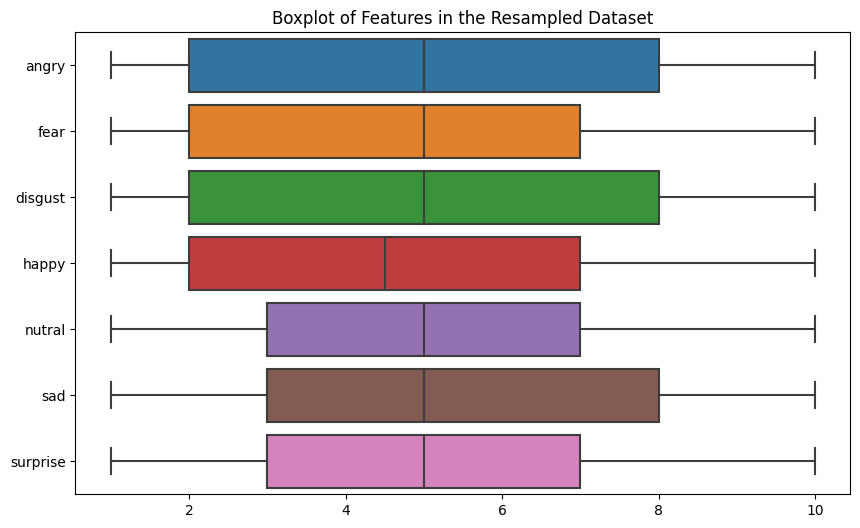

In [82]:
#pengecekkan outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_resampled, orient='h')
plt.title("Boxplot of Features in the Resampled Dataset")
plt.show()

# Subbab X Normalisasi Terhadap Data Baru

In [48]:
from sklearn.preprocessing import StandardScaler

X = data_resampled.drop(columns=['depression'])
scaler = StandardScaler()
 
# Melakukan normalisasi data
X_scaled = scaler.fit_transform(X)

Melakukan K-Fold Cross Validation dan Menampilkan Confussion Matrix Terhadap Data Baru

Fold 1
              precision    recall  f1-score   support

        High       0.82      0.93      0.87        30
         Low       0.85      0.77      0.81        44
    Moderate       0.83      0.83      0.83        53
    Very Low       1.00      1.00      1.00        26

    accuracy                           0.86       153
   macro avg       0.88      0.88      0.88       153
weighted avg       0.86      0.86      0.86       153



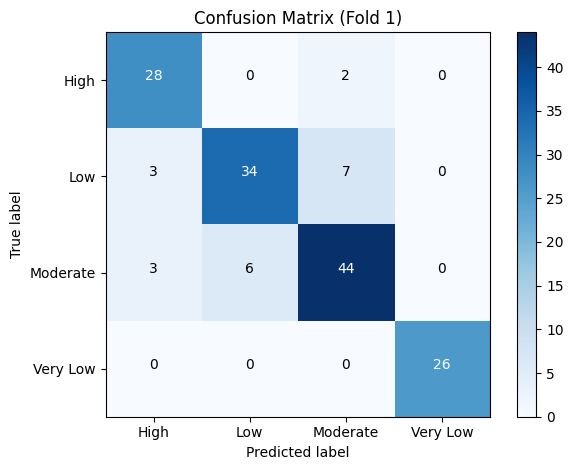

[[28  0  2  0]
 [ 3 34  7  0]
 [ 3  6 44  0]
 [ 0  0  0 26]]
Fold 2
              precision    recall  f1-score   support

        High       0.90      0.91      0.91        47
         Low       0.93      0.84      0.88        49
    Moderate       0.71      0.79      0.75        38
    Very Low       1.00      1.00      1.00        19

    accuracy                           0.87       153
   macro avg       0.89      0.89      0.88       153
weighted avg       0.88      0.87      0.87       153



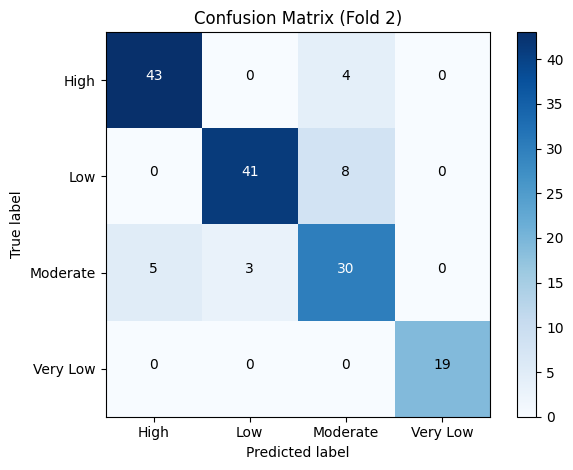

[[43  0  4  0]
 [ 0 41  8  0]
 [ 5  3 30  0]
 [ 0  0  0 19]]
Fold 3
              precision    recall  f1-score   support

        High       0.88      0.88      0.88        43
         Low       0.73      0.90      0.81        42
    Moderate       0.78      0.60      0.68        48
    Very Low       0.95      1.00      0.97        19

    accuracy                           0.82       152
   macro avg       0.84      0.85      0.84       152
weighted avg       0.82      0.82      0.81       152



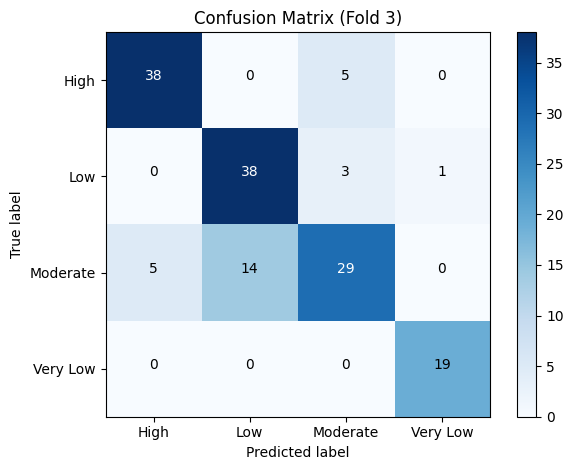

[[38  0  5  0]
 [ 0 38  3  1]
 [ 5 14 29  0]
 [ 0  0  0 19]]
Fold 4
              precision    recall  f1-score   support

        High       0.80      0.82      0.81        44
         Low       0.81      0.60      0.68        42
    Moderate       0.53      0.67      0.59        39
    Very Low       1.00      1.00      1.00        27

    accuracy                           0.75       152
   macro avg       0.78      0.77      0.77       152
weighted avg       0.77      0.75      0.75       152



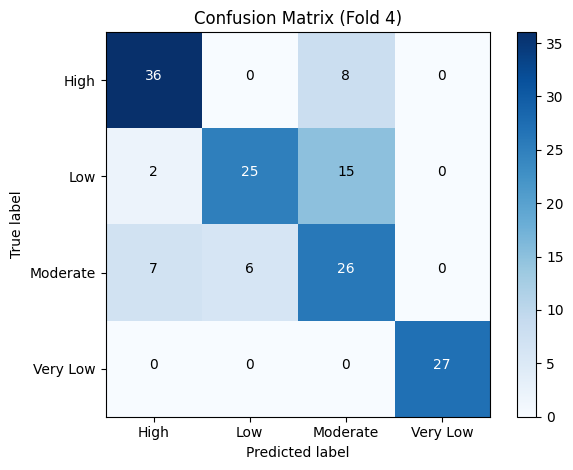

[[36  0  8  0]
 [ 2 25 15  0]
 [ 7  6 26  0]
 [ 0  0  0 27]]
Fold 5
              precision    recall  f1-score   support

        High       0.89      0.93      0.91        43
         Low       0.90      0.83      0.86        42
    Moderate       0.74      0.78      0.76        41
    Very Low       1.00      0.96      0.98        26

    accuracy                           0.87       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.87      0.87      0.87       152



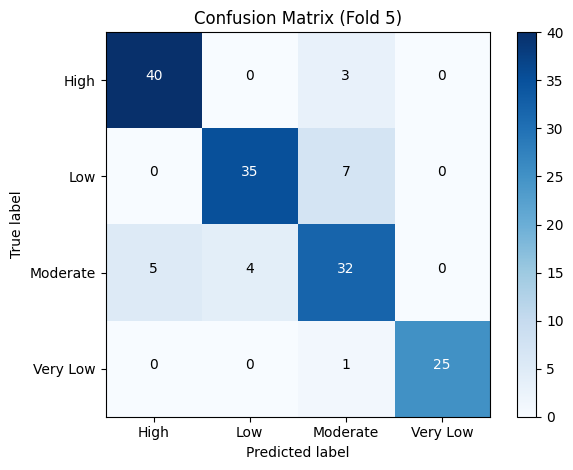

[[40  0  3  0]
 [ 0 35  7  0]
 [ 5  4 32  0]
 [ 0  0  1 25]]


In [49]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Define the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)


for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model for each fold
    print("Fold", i+1)
    print(classification_report(y_test, y_pred, zero_division=1))
    
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure()
   
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Fold {})".format(i+1))
    plt.colorbar()
    classes = model.classes_
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    print(confusion_matrix(y_test, y_pred))

1. **High**: Model memiliki tingkat precision yang tinggi (0.89), yang menunjukkan bahwa sebagian besar prediksi kelas "High" adalah benar. Recall yang tinggi (0.93) juga menunjukkan bahwa sebagian besar dari semua instance yang seharusnya termasuk dalam kelas "High" berhasil diprediksi dengan benar.

2. **Low**: Precision (0.90) dan recall (0.83) untuk kelas "Low" juga cukup baik. Hal ini menunjukkan bahwa sebagian besar dari semua instance yang diprediksi sebagai kelas "Low" adalah benar, dan sebagian besar dari semua instance yang seharusnya termasuk dalam kelas "Low" berhasil diprediksi dengan benar.

3. **Moderate**: Precision (0.74) dan recall (0.78) untuk kelas "Moderate" sedikit lebih rendah daripada kelas "High" dan "Low", tetapi masih dalam rentang yang dapat diterima. Hal ini menunjukkan bahwa ada ruang untuk perbaikan dalam memprediksi kelas "Moderate" dengan lebih baik.

4. **Very Low**: Untuk kelas "Very Low", precision (1.00) dan recall (0.96) sangat tinggi, yang menunjukkan bahwa sebagian besar prediksi kelas "Very Low" adalah benar, dan sebagian besar dari semua instance yang seharusnya termasuk dalam kelas "Very Low" berhasil diprediksi dengan benar.

Mencoba model lain. Membuat Model dengan Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression(max_iter=10000, solver='saga')

# Train the model on the training set
model.fit(X_train, y_train)

# Predict the labels on training set
y_train_pred = model.predict(X_train)

# Predict the labels on testing set
y_test_pred = model.predict(X_test)

# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)


Accuracy on training set: 0.8456486042692939
Accuracy on testing set: 0.8627450980392157


## Pengecekan parameter terbaik(Random Forest) dan validasi model setelah upsampling menggunakan Treshold

In [57]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Penyetelan Parameter Model
# Inisialisasi model
rf_model = RandomForestClassifier()

# Definisikan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=1)

# Lakukan penyetelan parameter
grid_search.fit(X, y)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)
print()

# 2. Evaluasi Model
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model pada data latih
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = best_rf_model.predict(X_test)

# Cetak classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Penyesuaian Threshold (Opsional)
# Contoh penyesuaian threshold
threshold = 0.6
y_pred_proba = best_rf_model.predict_proba(X_test)
y_pred_adjusted = (y_pred_proba[:, 1] >= threshold).astype(int)

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target labels to encoded integer labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert integer predictions to string labels using the label encoder
y_pred_adjusted_labels = label_encoder.inverse_transform(y_pred_adjusted)

print("Classification Report after Threshold Adjustment:")
print(classification_report(y_test, y_pred_adjusted_labels, zero_division=0))


Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.94        30
         Low       0.92      0.82      0.87        44
    Moderate       0.89      0.91      0.90        53
    Very Low       0.96      0.96      0.96        26

    accuracy                           0.91       153
   macro avg       0.91      0.92      0.92       153
weighted avg       0.91      0.91      0.91       153

Classification Report after Threshold Adjustment:
              precision    recall  f1-score   support

        High       0.25      1.00      0.40        30
         Low       1.00      0.77      0.87        44
    Moderate       0.00      0.00      0.00        53
    Very Low       0.00      0.00      0.00        26

    accuracy                           0.42       153
   macro avg       0.31      0.44      0.32       153
weight

In [61]:
from sklearn.model_selection import cross_val_score

# Cross-validation with k=5 and single process
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1_weighted', n_jobs=1)

# Print the cross-validation results
print("Cross-validation scores:", scores)
print("Mean F1-score:", scores.mean())

Cross-validation scores: [0.90797954 0.96049727 0.91319697 0.93394072 0.95301414]
Mean F1-score: 0.9337257285099465


Dengan menggunakan cross-validation dengan k=5, kita mendapatkan skor F1-weighted yang bervariasi antara 0.907 hingga 0.960 untuk setiap lipatan (fold) validasi. Mean F1-score dari semua lipatan validasi adalah sekitar 0.934. Ini menunjukkan bahwa model memiliki kinerja yang konsisten dan cukup baik dalam melakukan klasifikasi pada data yang tidak terlihat (out-of-sample). Dengan demikian, model tersebut dapat dianggap cukup dapat diandalkan untuk digunakan dalam memprediksi kelas target pada data baru.

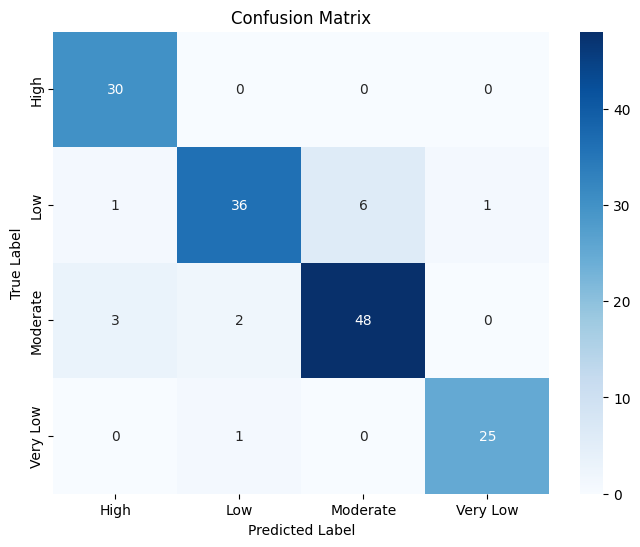

[[30  0  0  0]
 [ 1 36  6  1]
 [ 3  2 48  0]
 [ 0  1  0 25]]


In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung prediksi dari model pada data uji
y_pred = best_rf_model.predict(X_test)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))


Model memiliki kinerja yang baik dalam mengklasifikasikan data ke dalam kategori High dan Very Low, dengan semua data pada kategori ini diklasifikasikan dengan benar.

In [ ]:
#install catboost
!pip install catboost

## Pencarian Parameter Terbaik sebelum menerapkan catboost

Parameter terbaik CatBoost: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

Classification Report CatBoost:
              precision    recall  f1-score   support

        High       0.91      1.00      0.95        30
         Low       0.95      0.84      0.89        44
    Moderate       0.89      0.91      0.90        53
    Very Low       0.96      1.00      0.98        26

    accuracy                           0.92       153
   macro avg       0.93      0.94      0.93       153
weighted avg       0.92      0.92      0.92       153

Cross-validation scores CatBoost: [0.92784654 0.96049727 0.92694198 0.94727824 0.96701816]
Mean F1-score CatBoost: 0.9459164363486483


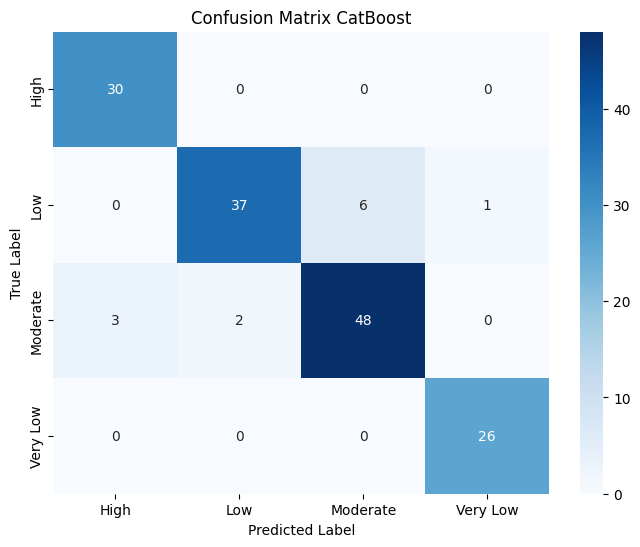

[[30  0  0  0]
 [ 0 37  6  1]
 [ 3  2 48  0]
 [ 0  0  0 26]]


In [65]:
#best parameter
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Inisialisasi model CatBoost
catboost_model = CatBoostClassifier(loss_function='MultiClass', verbose=0)

# Mendefinisikan grid parameter yang akan diuji
param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8, 10],
    'learning_rate': [0.1, 0.01]
}

# Inisialisasi GridSearchCV
grid_search_catboost = GridSearchCV(catboost_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=1)

# penyetelan parameter
grid_search_catboost.fit(X, y)

# Cetak parameter terbaik
print("Parameter terbaik CatBoost:", grid_search_catboost.best_params_)
print()

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model pada data latih
best_catboost_model = CatBoostClassifier(loss_function='MultiClass', verbose=0, **grid_search_catboost.best_params_)
best_catboost_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_catboost = best_catboost_model.predict(X_test)

# Cetak classification report
print("Classification Report CatBoost:")
print(classification_report(y_test, y_pred_catboost))

# Cross-validation with k=5 and single process
scores = cross_val_score(best_catboost_model, X, y, cv=5, scoring='f1_weighted', n_jobs=1)

# Print the cross-validation results
print("Cross-validation scores CatBoost:", scores)
print("Mean F1-score CatBoost:", scores.mean())

# Hitung prediksi dari model pada data uji
y_pred = best_catboost_model.predict(X_test)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_catboost_model.classes_, yticklabels=best_catboost_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.title('Confusion Matrix CatBoost')
plt.show()
print(confusion_matrix(y_test, y_pred))

## Menerapkan Catboost sesuai dengan parameter terbaik yang didapatkan

In [67]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model CatBoost dengan parameter terbaik
catboost_model = CatBoostClassifier(depth=8, iterations=200, learning_rate=0.1, loss_function='MultiClass', verbose=0)

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model pada data train
catboost_model.fit(X_train, y_train)

# prediksi pada data uji
y_pred_catboost = catboost_model.predict(X_test)

# Evaluasi model dengan classification report
print("Classification Report CatBoost:")
print(classification_report(y_test, y_pred_catboost))

# confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost, labels=catboost_model.classes_)

# Print confusion matrix
print("Confusion Matrix CatBoost:")
print(cm_catboost)

# cross-validation untuk validasi kinerja model
scores_catboost = cross_val_score(catboost_model, X, y, cv=5, scoring='f1_weighted', n_jobs=1)
print("Cross-validation scores CatBoost:", scores_catboost)
print("Mean F1-score CatBoost:", scores_catboost.mean())


Classification Report CatBoost:
              precision    recall  f1-score   support

        High       0.91      1.00      0.95        30
         Low       0.95      0.84      0.89        44
    Moderate       0.89      0.91      0.90        53
    Very Low       0.96      1.00      0.98        26

    accuracy                           0.92       153
   macro avg       0.93      0.94      0.93       153
weighted avg       0.92      0.92      0.92       153

Confusion Matrix CatBoost:
[[30  0  0  0]
 [ 0 37  6  1]
 [ 3  2 48  0]
 [ 0  0  0 26]]
Cross-validation scores CatBoost: [0.92784654 0.96049727 0.92694198 0.94727824 0.96701816]
Mean F1-score CatBoost: 0.9459164363486483


## Membuat kurva ROC dan AUC

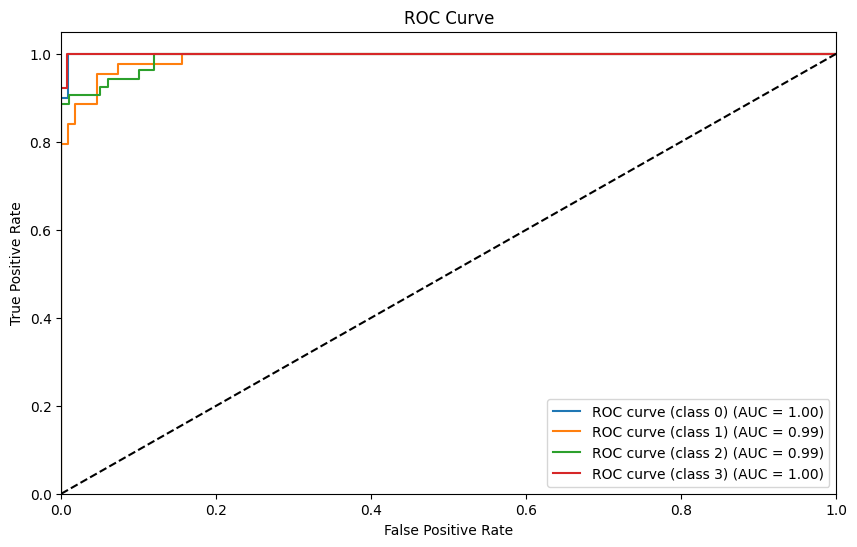

In [84]:
# scikit learn roc-auc curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the target labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Get the predicted probabilities
y_pred_prob = catboost_model.predict_proba(X_test)

# Compute ROC curve and ROC-AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(catboost_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    
# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(len(catboost_model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Analisis gambar kurva ROC menunjukkan bahwa model klasifikasi tersebut sangat akurat dalam mengklasifikasikan contoh-contoh dari keempat kelas tersebut. Semua kurva ROC memiliki nilai AUC 1.00, yang menunjukkan bahwa model klasifikasi tersebut sempurna.

In [102]:
# Save model from catboost
catboost_model.save_model('catboost_newModel')

Model telah disimpan dan siap untuk digunakan

## Mencoba prediksi data baru dengan model yang sudah dibuat

In [8]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

In [9]:
model = CatBoostClassifier()
model.load_model('catboost_newModel')

# Predict the labels on testing set
data = pd.read_excel("depression_sampling_resampled_new.xlsx")
data.head()

,angry,fear,disgust,happy,nutral,sad,surprise,depression
0,2,5,7,6,6,4,1,Moderate
1,10,2,2,9,9,10,9,Low
2,7,6,2,5,8,5,8,Moderate
3,5,3,3,4,5,6,8,Moderate
4,6,4,10,6,7,6,8,Moderate


In [10]:
#mapping value depression
depression_mapping = {'Very Low': 0 , 'Low':1,  'Moderate' :2, 'High':3}
data['depression'] = data['depression'].map(depression_mapping)

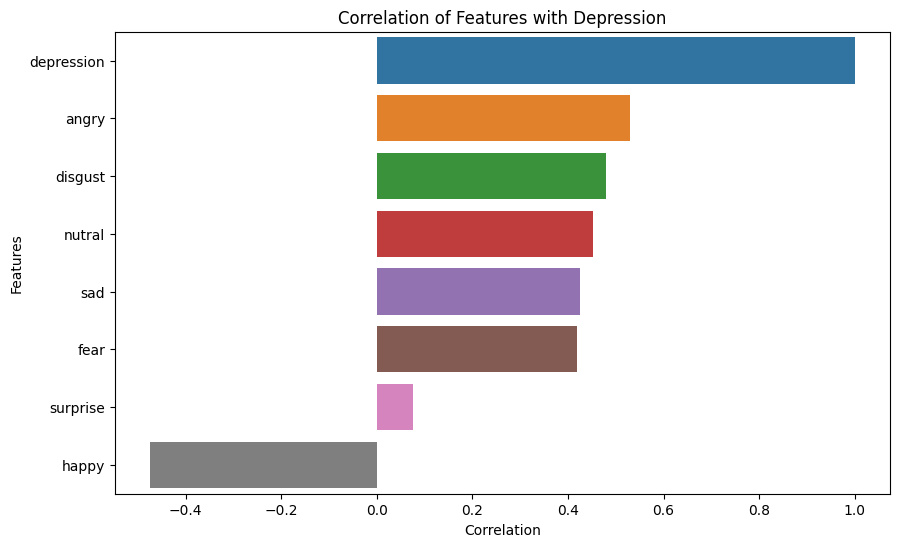

In [13]:
#buat korelasi semua kolom dengan kolom target
correlation = data.corr()['depression'].sort_values(ascending=False)

# Visualize the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of Features with Depression')
plt.show()

In [16]:
new_data = {
    'angry': [8],
    'fear': [10],
    'disgust': [6],
    'happy': [8],
    'nutral': [0],
    'sad': [8],
    'surprise': [8]
}   

new_data = pd.DataFrame(new_data)

# Predict the labels on new data
new_data_pred = model.predict(new_data)
new_data_pred

array([['Low']], dtype=object)